In [1]:
from __future__ import print_function

import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from __init__ import *
from datamanage import DataIO
from advection2d import Grid2d, Simulation
from pdfsolver import PdfGrid
from Learning import PDElearn

In [2]:
problem = "gaussian"
tmax = .7
C = 0.2
k = 0.4
power = 2

xmin = -4.0
xmax = 4.0
ymin = -4.0
ymax = 4.0

params = [0.0, 0.3, 0.0, 0.3, 0]

ng = 3
nx = 400
ny = 400

err = []

# no limiting
gg = Grid2d(nx, ny, ng, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax)
sg = Simulation(gg, C=C, k=k, power=power)
sg.init_cond(problem, params)
ainit = sg.grid.a.copy()


print('starting to evolve')
tt, atot = sg.evolve(tmax=tmax)


starting to evolve
0.0009876543209876541 708
1 708
2 708
3 708
4 708
5 708
6 708
7 708
8 708
9 708
10 708
11 708
12 708
13 708
14 708
15 708
16 708
17 708
18 708
19 708
20 708
21 708
22 708
23 708
24 708
25 708
26 708
27 708
28 708
29 708
30 708
31 708
32 708
33 708
34 708
35 708
36 708
37 708
38 708
39 708
40 708
41 708
42 708
43 708
44 708
45 708
46 708
47 708
48 708
49 708
50 708
51 708
52 708
53 708
54 708
55 708
56 708
57 708
58 708
59 708
60 708
61 708
62 708
63 708
64 708
65 708
66 708
67 708
68 708
69 708
70 708
71 708
72 708
73 708
74 708
75 708
76 708
77 708
78 708
79 708
80 708
81 708
82 708
83 708
84 708
85 708
86 708
87 708
88 708
89 708
90 708
91 708
92 708
93 708
94 708
95 708
96 708
97 708
98 708
99 708
100 708
101 708
102 708
103 708
104 708
105 708
106 708
107 708
108 708
109 708
110 708
111 708
112 708
113 708
114 708
115 708
116 708
117 708
118 708
119 708
120 708
121 708
122 708
123 708
124 708
125 708
126 708
127 708
128 708
129 708
130 708
131 708
132 708
133 708

In [3]:
# mxl = 170
# mxr = 140
# myl = 170
# myr = 150

mxl = 100
mxr = 100
myl = 100
myr = 100


fu_xUt = atot[gg.ilox+mxl: gg.ihix+1-mxr, gg.iloy+myl: gg.ihiy+1-myr, :]
fu_Uxt = np.transpose(fu_xUt, (1, 0, 2)) # Or np.transpose(fu, (2, 1, 0))
xx = gg.x[gg.ilox+mxl:gg.ihix+1-mxr]
uu = gg.y[gg.iloy+myl:gg.ihiy+1-myr]

U, X = np.meshgrid(uu, xx, indexing='ij')

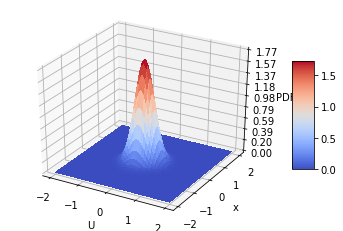

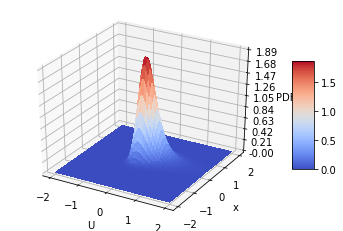

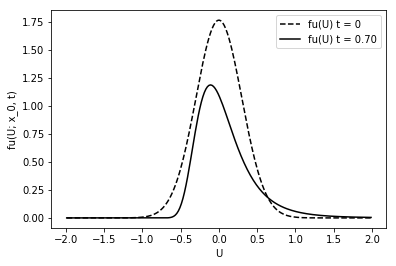

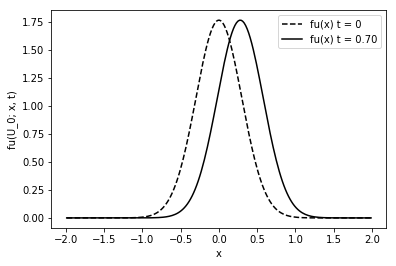

In [20]:
# Plotting

tidx = -1

for i in [0, tidx]:
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(U, X, fu_Uxt[:, :, i], cmap=cm.coolwarm, linewidth=0, antialiased=False)
    ax.set_xlabel('U')
    ax.set_ylabel('x')
    ax.set_zlabel('PDF')
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.colorbar(surf, shrink=0.5, aspect=5)


fig = plt.figure()

pd = 10
n = 1
xidxmid = int((len(xx)-1)/2)
xidxvec = [xidxmid-int(n/2)+i*pd for i in range(n)]
c= ['k', 'r', 'b']
for i, xidx in enumerate(xidxvec):
    plt.plot(uu, fu_Uxt[:, xidx, 0], '--', color=c[i])
    plt.plot(uu, fu_Uxt[:, xidx, tidx], color=c[i])
plt.xlabel('U')
plt.ylabel('fu(U; x_0, t)')
plt.legend(['fu(U) t = 0', 'fu(U) t = %3.2f'%(tt[-1])])

plt.savefig('fuU_advection_reaction')

fig = plt.figure()

uidxmid = int((len(uu)-1)/2)
plt.plot(xx, fu_Uxt[uidxmid, :, 0], '--', color=c[i])
plt.plot(xx, fu_Uxt[uidxmid, :, tidx], color=c[i])
plt.xlabel('x')
plt.ylabel('fu(U_0; x, t)')
plt.legend(['fu(x) t = 0', 'fu(x) t = %3.2f'%(tt[-1])])

plt.savefig('fux_advection_reaction')

plt.show()

In [7]:
# Save
case = 'advection_reaction'
D = DataIO(case=case)

gridvars = {'u': [uu[0], uu[-1], (uu[-1]-uu[0])/len(uu)], 't': [tt[0], tt[-1], (tt[-1]-tt[0])/len(tt)], 'x':[xx[0], xx[-1], (xx[-1]-xx[0])/len(xx)]}
ICparams = {'u0':'gaussian', 
            'fu0':'gaussian',
            'params': params,
            'k': k,
            'reaction u^': power,
            'distribution': 'PDF'}

solution = {'fu': fu_Uxt, 'gridvars': gridvars}
metadata = {'ICparams': ICparams, 'gridvars': gridvars} 

savename = D.saveSolution(solution, metadata)


In [6]:
# LEARN


loadnamenpy = savename + '.npy'
#loadnamenpy = "advection_reaction_2562.npy"
    
case = '_'.join(loadnamenpy.split('_')[:2])
dataman = DataIO(case) 
fu, gridvars, ICparams = dataman.loadSolution(loadnamenpy)

print(loadnamenpy)

#fu = fu_Uxt

#Make fu smaller (in time)
tt = np.linspace(gridvars['t'][0], gridvars['t'][1], round( (gridvars['t'][1] - gridvars['t'][0]) / gridvars['t'][2] ))
period = 4
indexes = np.array([i*period for i in range((len(tt))//period)])
ttnew = tt[indexes]
fu = fu[:, :, indexes]
gridvars['t'][1] = ttnew[-1]
gridvars['t'][2] = (ttnew[-1]-ttnew[0])/len(ttnew)


grid = PdfGrid(gridvars)
# Learn 
difflearn = PDElearn(grid=grid, fu=fu, ICparams=ICparams, scase=case, trainratio=0.4, debug=False, verbose=True)
difflearn.fit_sparse(feature_opt='1storder', variableCoef=True, variableCoefBasis='simple_polynomial', variableCoefOrder=2, use_sindy=True, sindy_alpha=0.005, shuffle=False)

{'u0': 'gaussian', 'fu0': 'gaussian', 'params': [0.0, 0.3, 0.0, 0.3, 0], 'k': 0.4, 'reaction u^': 2, 'distribution': 'PDF'}
{'u': [-1.9899999999999998, 1.9900000000000002, 0.0199], 't': [0.0, 0.7, 0.0009887005649717514], 'x': [-1.9899999999999998, 1.9900000000000002, 0.0199]}
advection_reaction_2018.npy


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  app.launch_new_instance()


Variable coefficient type: simple_polynomial


KeyboardInterrupt: 

array([2, 4, 6, 8])